<a href="https://colab.research.google.com/github/HiroshiATakano/GitHub/blob/master/Chap_4_%E5%8D%98%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 27.0MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=18bd55532aaeb32b4a7fe16e19f59f2c6b5d25caa62f17d332ae98d6ef5741db
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.figure import figaspect
from matplotlib import colors as mcolors

from pystan import StanModel
import pickle
import pandas.util.testing as tm

import statsmodels.formula.api as smf

import seaborn as sns
import sys
import math
from matplotlib.backends.backend_pdf import PdfPages
from scipy import stats
from scipy.stats import norm

from statsmodels.formula.api import glm
import statsmodels.api as sm

import os

os.chdir('/content/drive/My Drive/StanとRでベイズ統計/chap04')
os.getcwd()

'/content/drive/My Drive/StanとRでベイズ統計/chap04'

#4.2 Stanの基本的な文法

##4.2.1 ブロック構成

##4.2.2 文法の基礎

In [24]:
with open("model/model4-1.stan") as f:
    print(f.read())

data {
  int N;
  real Y[N];
}

parameters {
  real mu;
}

model {
  for (n in 1:N) {
    Y[n] ~ normal(mu,1);
  }
  mu ~ normal(0,100);
}



##4.2.3 コーディング規約

#4.3 StanのIp__とtarget



In [25]:
with open("model/model4-1b.stan") as f:
    print(f.read())

data {
  int N;
  real Y[N];
}

parameters {
  real mu;
}

model {
  for (n in 1:N) {
    target += normal_lpdf(Y[n] | mu, 1);
  }
  target += normal_lpdf(mu | 0, 100);
}



#4.4　単回帰



In [26]:
salary = pd.read_csv('./data/data-salary.txt',header=0)
salary.iloc[np.r_[0:3,-1]]

,X,Y
0,24,472
1,24,403
2,26,454
19,59,1314


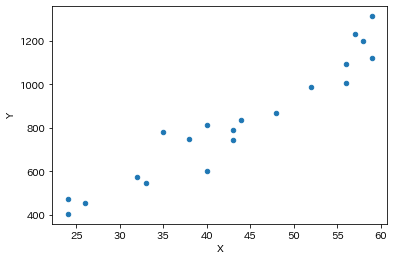

In [27]:
salary.plot(x='X',y='Y',kind='scatter')

In [28]:
model = smf.ols('Y ~ X', data=salary)
res = model.fit()
res.params

Intercept   -119.697132
X             21.904201
dtype: float64

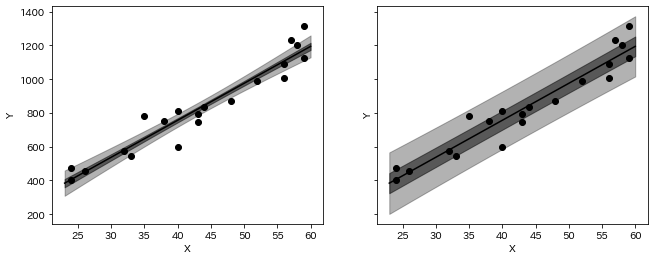

In [47]:
X_new = pd.DataFrame(data=np.arange(23,61).reshape((-1,1)), columns=['X'])
predictions = res.get_prediction(X_new)
int_95 = predictions.summary_frame(alpha=0.05)
int_50 = predictions.summary_frame(alpha=0.5)

x,y = X_new['X'], int_95['mean']

_, axes = plt.subplots(1,2,figsize=figaspect(3/8),sharex=True,sharey=True)
for ax, category in zip(axes, ['mean','obs']):
  color = 'k'
  ax.scatter(salary['X'],salary['Y'],c=color)
  ax.plot(x,y,c=color)
  lower = '{}_ci_lower'.format(category)
  upper = '{}_ci_upper'.format(category)
  ax.fill_between(x,int_50[lower],int_50[upper],color=color, alpha=0.5)
  ax.fill_between(x,int_95[lower],int_95[upper],color=color, alpha=0.3)
  plt.setp(ax,xlabel='X',ylabel='Y')

In [8]:
with open("model/model4-5.stan") as f:
    print(f.read())

data {
    int N;
    real X[N];
    real Y[N];
}

parameters {
    real<lower=0> sigma;
    real Intercept;
    real b;
}

model {
    for (i in 1:N) {
        Y[i] ~ normal(Intercept + b * X[i], sigma);
    }
}
